### Homework 6

이번 과제에서는 Multivariate Time Series를 이용하여 여러 문제를 해결해보도록 한다

#### 1. Capital Asset Pricing Models

Capital Asset Pricing Model에 따르면, 특정 자산의 기대 수익률 $E[r_a]$는 다음과 같이 나타낼 수 있다

$$E[r_a] = r_f + \beta_a(E[r_m] - r_f)$$

여기서 $r_f$는 중앙정부 국채 수익률과 같은 무위험자산의 수익률이고, $E[r_m]$은 시장의 기대 수익률이다. 보통 한 나라의 거래소 index의 수익률을 많이 사용하며, 한국의 경우 KOSPI index, 미국의 경우에는 S&P500 index를 사용한다. $\beta_a$는 자산의 변동으로부터 추정하는데, 다음과 같이 정의된다

$$\beta_a = \frac{\mathrm{Cov}(r_a, r_m)}{\mathrm{Var}(r_m)}$$

즉, CAPM모형은 자산의 수익률인 $E[r_a]$와 coefficient가 $\beta_a$인 시장 프리미엄$(E[r_m] - r_f)$ 사이의 선형 관계로 이뤄져 있다

만약 여기서 자산의 시장 대비 초과 수익률 $E[r_a] - r_f$과 $(E[r_m] - r_f)$의 관계로 나타내고 싶다면 다음과 같이 나타낼 수 있다

$$(E[r_a] - r_f) = \alpha + \beta_a(E[r_m] - r_f)$$

**1.1 Data Import**

아래의 library를 이용하여 Hynics와 KOSPI index의 2020년 1월 1일부터 2023년 7월 31일까지의 데이터를 가져오라

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr

start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2023-07-31')

hynics = pdr.DataReader("000660", "naver", start_date, end_date).astype(int)
hynics

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,96000,96200,94100,94700,2342070
2020-01-03,96500,97900,94300,94500,3021380
2020-01-06,93000,95300,92800,94300,2577573
2020-01-07,94500,95400,94000,94000,2489429
2020-01-08,96400,99500,95200,97400,7014748
...,...,...,...,...,...
2023-07-25,114000,114200,112200,113400,2678385
2023-07-26,116000,116100,111300,113000,4995935
2023-07-27,115000,124000,114100,124000,9638980


In [2]:
kospi = pdr.DataReader('KOSPI', "naver", start_date, end_date).astype(float)
kospi

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,2201.21,2202.32,2171.84,2175.17,494677.0
2020-01-03,2192.58,2203.38,2165.39,2176.46,631562.0
2020-01-06,2154.97,2164.42,2149.95,2155.07,592670.0
2020-01-07,2166.60,2181.62,2164.27,2175.54,568235.0
2020-01-08,2156.27,2162.32,2137.72,2151.31,913830.0
...,...,...,...,...,...
2023-07-25,2643.35,2646.71,2621.60,2636.46,723472.0
2023-07-26,2638.76,2639.21,2580.98,2592.36,834107.0
2023-07-27,2599.82,2617.61,2586.36,2603.81,594163.0


**1.2 Converting to Matrix**

hynics와 KOSPI index의 데이터를 월별 수익률로 계산한 뒤, 하나의 DataFrame으로 병합하여라

In [3]:
monthly_hynics = hynics.resample('M').last()
kospi_mon = kospi.resample('M').last()

ret_hynics = np.log(monthly_hynics.Close) - np.log(monthly_hynics.Close.shift(1))
ret_kospi = np.log(kospi_mon.Close) - np.log(kospi_mon.Close.shift(1))

matrix = pd.concat([ret_hynics, ret_kospi], axis = 1).dropna()
matrix.columns = ['Hynics','KOSPI']

matrix

,Hynics,KOSPI
Date,,
2020-02-29,-0.061762,-0.064318
2020-03-31,-0.053751,-0.124367
2020-04-30,0.004790,0.104314
2020-05-31,-0.026636,0.041261
2020-06-30,0.043224,0.038057
2020-07-31,-0.027399,0.064754
2020-08-31,-0.097608,0.033573
2020-09-30,0.111996,0.000739
2020-10-31,-0.050041,-0.026439


**1.3 Estimation with OLS**

무위험이자율이 3%라고 가정할 때, 아래 library를 사용하여 OLS를 추정량을 보고하라. 추정된 $\beta$는 얼마인가? 적절한 방법을 이용하여 시장수익률과 hynics 수익률 간의 관계도 plotting하여라.

In [4]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [5]:
X = matrix['KOSPI'] - 0.03
X = sm.add_constant(X)
y = matrix['Hynics']

model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Hynics   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     28.44
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           4.08e-06
Time:                        16:58:52   Log-Likelihood:                 52.543
No. Observations:                  42   AIC:                            -101.1
Df Residuals:                      40   BIC:                            -97.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0300      0.012      2.540      0.0

In [6]:
print('The estimated Beta is %.4f' % result.params[1])

The estimated Beta is 0.9404


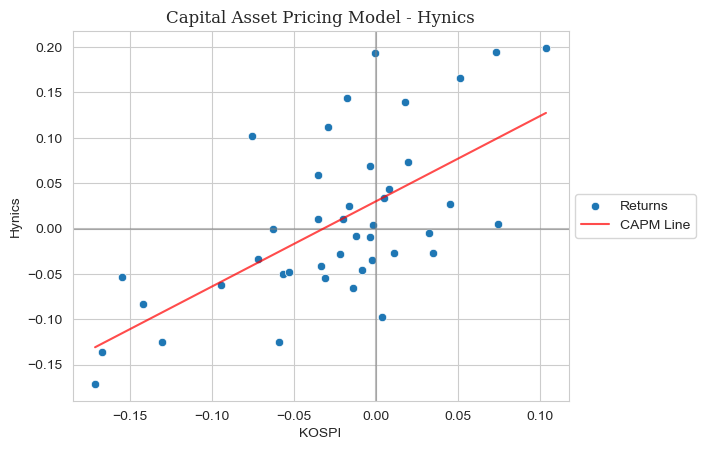

In [7]:
import seaborn as sns
beta, alpha = np.polyfit(x = X['KOSPI'] , y = y ,deg = 1)
plt.axvline(0, color = 'grey', alpha = 0.5)
plt.axhline(0, color = 'grey', alpha = 0.5)
sns.scatterplot(y = y, x = X['KOSPI'], label = 'Returns')
sns.lineplot(x = X['KOSPI'], y = alpha + X['KOSPI'] * beta, color = 'red', label = 'CAPM Line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Capital Asset Pricing Model - Hynics', fontfamily = 'Serif')
plt.show()

**1.4 Beta Mapping Risk Estimation**

CAPM을 활용해 추정한 $\beta$를 이용해 자산의 변동성을 다음과 같이 추정할 수 있다

$$\sigma_a = \beta_a \times \sigma_m$$

추정된 자산의 변동성을 Hynics의 데이터만을 사용하여 추정한 변동성과 비교하라. 차이가 있는가? 있다면 어느 방법이 변동성을 더 작게 추정하는가? beta mapping을 이용하여 리스크를 추정할 때 문제점은 무엇인가?

In [8]:
print('Estimated volatility using Beta Mapping : ', beta * X['KOSPI'].std())

Estimated volatility using Beta Mapping :  0.05910132103496091


In [9]:
print('Standard deviation : ', y.std())

Standard deviation :  0.09168479939989556


#### 2. Macroeconomics

homework.xlsx를 사용하여 다음을 수행하라

**2.1 import data**

excel 파일 내에서 GDP와 총자본형성, 총 수출액, 총 소비액을 선택하여 matrix를 만들어라

In [10]:
data = pd.read_excel('homework.xlsx', index_col = 0)
private_consumption = data.iloc[1,:]
capital_formation = data.iloc[5,:]
export = data.iloc[-8,:]
gdp = data.iloc[-1,:]

matrix = pd.concat([gdp, capital_formation, private_consumption, export], axis = 1)
matrix = pd.DataFrame(matrix.values, index = pd.date_range(start = '2000-01-01', end = '2019-03-31', freq = 'Q'),
                      columns = ['GDP','capital_formation','private_consumption','export']).astype('float')
matrix

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,GDP,capital_formation,private_consumption,export
2000-03-31,190321.8,63385.6,114788.2,56284.9
2000-06-30,205221.2,75929.1,110820.1,62942.2
2000-09-30,209631.1,76956.9,112953.9,64206.4
2000-12-31,215669.6,73464.5,117553.3,67257.6
2001-03-31,198932.5,61724.2,117998.0,60472.2
...,...,...,...,...
2018-03-31,376432.0,125571.5,192356.2,204235.2
2018-06-30,400571.4,136320.9,186147.4,219140.8
2018-09-30,400308.8,126925.8,191461.3,221896.2
2018-12-31,420201.9,138377.4,195452.5,229992.6


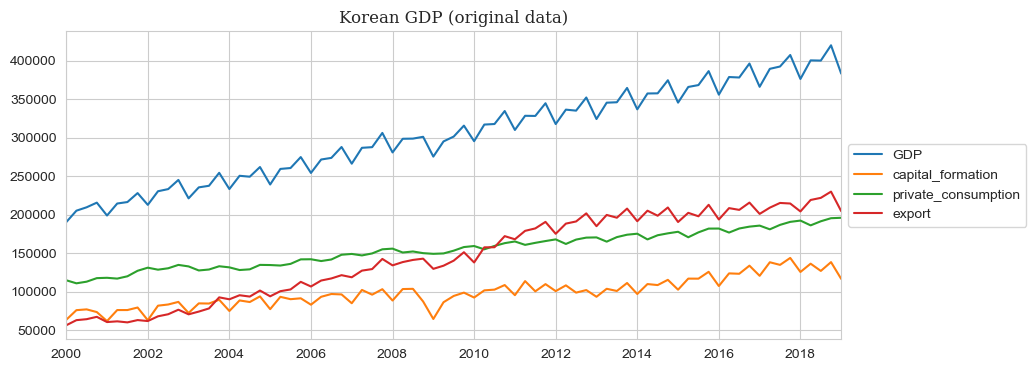

In [11]:
matrix.plot(figsize = (10,4))
plt.title('Korean GDP (original data)', fontfamily = 'Serif', fontsize = 12)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

**2.2 VAR estimation**

아래 library와 데이터를 알맞게 가공하여 $\mathrm{VAR}(4)$ 모형을 추정하라. 여기서 차분은 전년도 대비 성장률을 사용하도록 한다

In [12]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [13]:
matrix_period = matrix.pct_change(periods = 4).dropna()
matrix_period

,GDP,capital_formation,private_consumption,export
2001-03-31,0.045243,-0.026211,0.027963,0.074395
2001-06-30,0.045365,0.001740,0.055337,-0.024497
2001-09-30,0.032506,-0.011436,0.061964,-0.064645
2001-12-31,0.057546,0.080318,0.081380,-0.062793
2002-03-31,0.069630,0.018795,0.111437,0.021741
...,...,...,...,...
2018-03-31,0.027864,0.041457,0.035130,0.015894
2018-06-30,0.028189,-0.013618,0.028483,0.047687
2018-09-30,0.019605,-0.058275,0.025072,0.030750
2018-12-31,0.031001,-0.037803,0.024997,0.072040


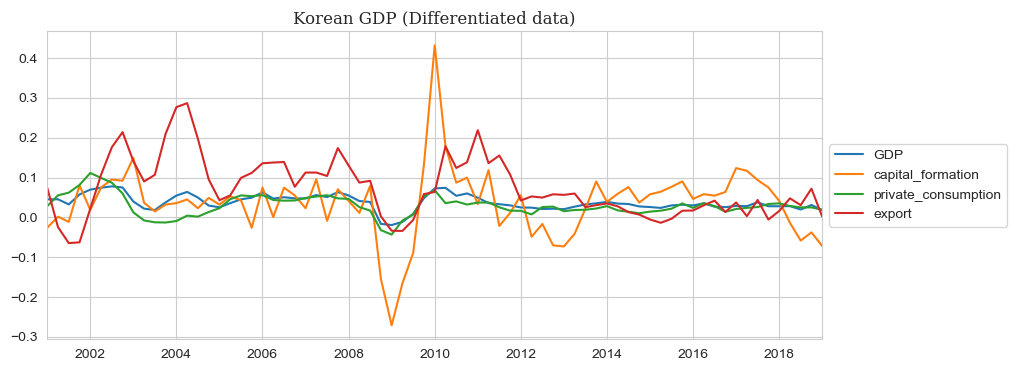

In [14]:
matrix_period.plot(figsize = (10,4))
plt.title('Korean GDP (Differentiated data)', fontfamily = 'Serif', fontsize = 12)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

In [15]:
model = VAR(matrix_period).fit(4, trend = 'c')
model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 13, Sep, 2023
Time:                     16:58:52
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -28.9672
Nobs:                     69.0000    HQIC:                  -30.2955
Log likelihood:           751.702    FPE:                3.03019e-14
AIC:                     -31.1690    Det(Omega_mle):     1.25566e-14
--------------------------------------------------------------------
Results for equation GDP
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                          0.013493         0.005545            2.434           0.015
L1.GDP                         0.876266         0.285992            3.064           0.002
L1.capital_formation      

**2.3 Impulse response analysis**

모든 변수에 대하여 7기간 충격반응함수 분석을 하라. 어떤 결과가 나왔는가? 결과는 어떻게 해석해야 하는가?

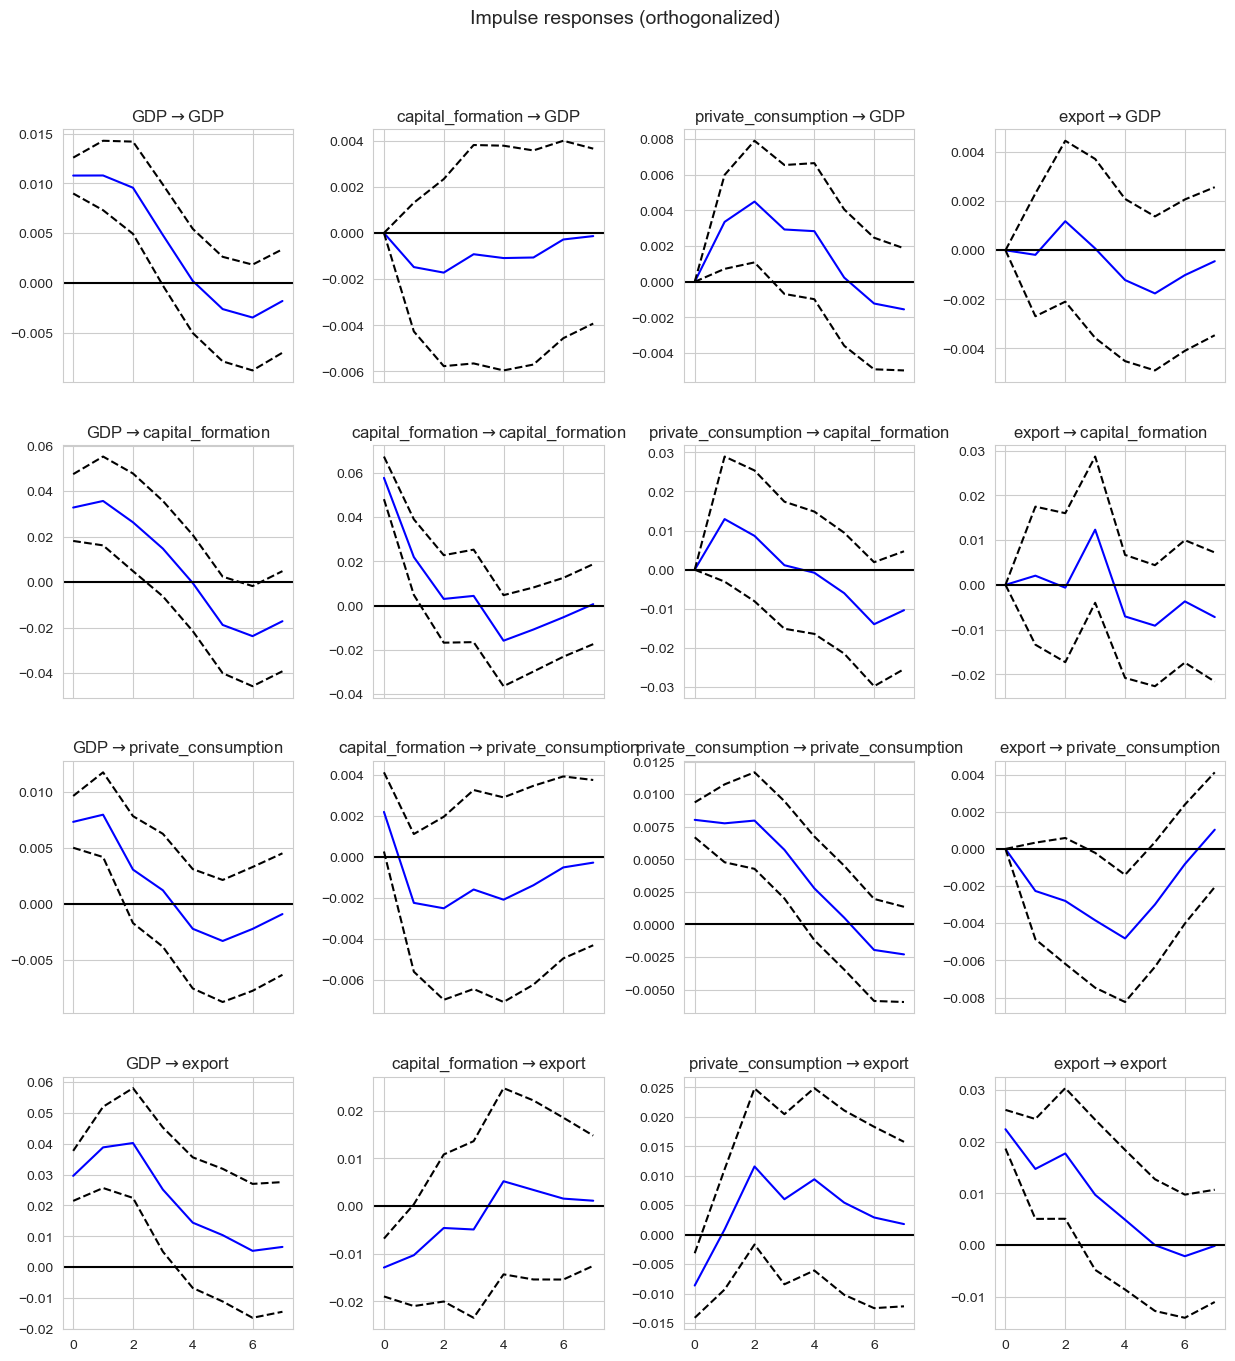

In [16]:
irf = model.irf(7)
irf.plot(orth = True, figsize = (15,15))
plt.subplots_adjust(left = 0.125, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.35, hspace = 0.25)
plt.show()

**2.4 GDP affection**

이번에는 GDP 변수의 10기간 충격반응함수를 분석하라. 어떤 결과가 나오는가? 전기의 GDP가 소비에 영향을 끼친다는 Paul Samuelson의 주장은 유효한가?

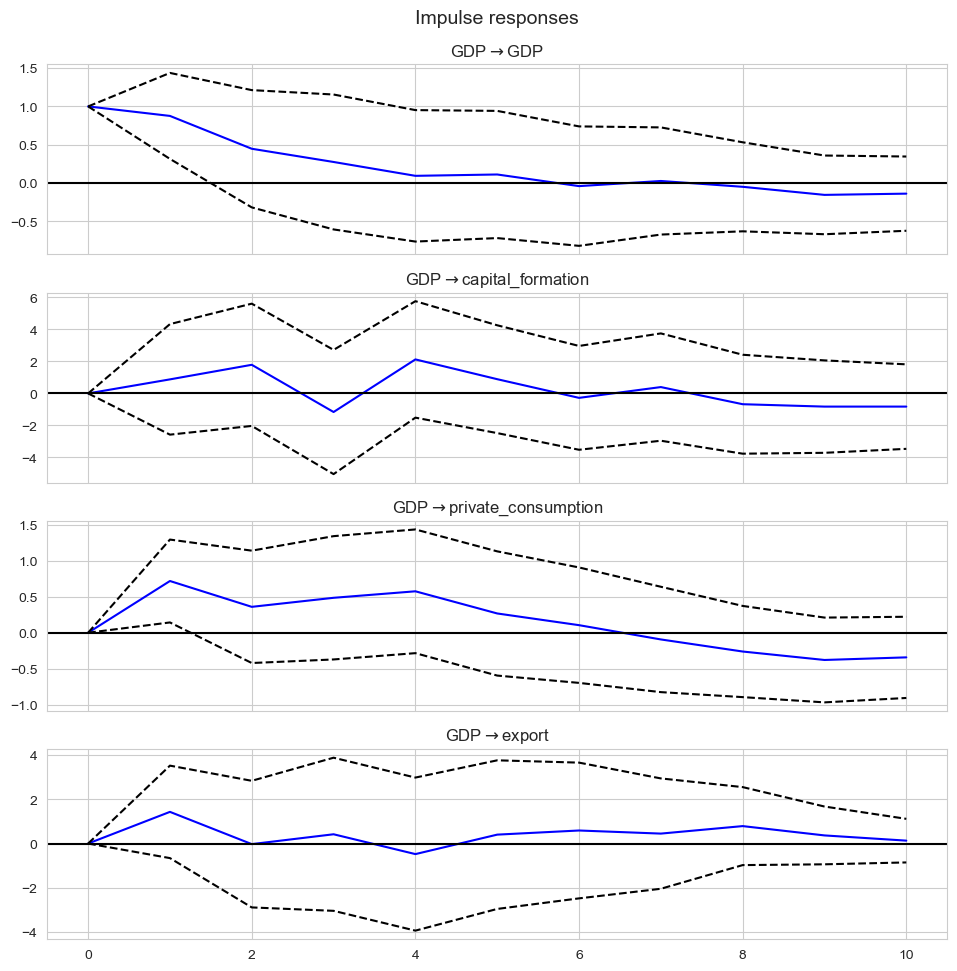

In [17]:
irf2 = model.irf(10)
irf2.plot(impulse = 'GDP')
plt.show()

GDP는 총소비에 긍정적인 충격을 주기 때문에, Paul Samuelson의 주장은 유효한 것으로 보인다

**2.5 Granger Causality**

추정된 모형에 대해서 Granger 인과관계를 검정하라. 전기의 GDP가 소비에 대해 Granger 인과성을 가지고 있는가? 전기의 GDP가 소비에 영향을 끼친다는 Paul Samuelson의 주장은 유효한가?

In [18]:
gctest = model.test_causality('private_consumption', 'GDP', kind = 'wald')
print(gctest.summary())

Granger causality Wald-test. H_0: GDP does not Granger-cause private_consumption. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         10.56          9.488   0.032  4
----------------------------------------


전기의 GDP는 소비에 대해 Granger 인과관계를 가진다. 즉, Paul Samulenson의 주장은 타당하다

#### 3. VAR Model

Bivariate $\mathrm{VAR}$ model을 고려하자

$$r_{1t} = \phi_{10} + \Phi_{11}r_{1,t-1} + \Phi_{12}r_{2,t-1} + a_{1t}$$
$$r_{2t} = \phi_{20} + \Phi_{21}r_{1,t-1} + \Phi_{22}r_{2,t-1} + a_{2t}$$

여기서 $\begin{pmatrix} a_{1t} \\ a_{2t} \end{pmatrix} \sim \mathrm{IID}(0,\Sigma)$인 백색잡음 계열이다

**3.1 다음 문장에 대해 진위를 논하여라**

> 시계열 $\{r_{1t}\}$와 $\{r_{2t}\}$는 concurrently correlated하지 않다. 그 이유는 $\mathrm{VAR}$모형이 두 시계열간의 dynamic relationship만을 고려하기 때문이다.

거짓이다. $\{r_{1t}\}$와 $\{r_{2t}\}$ 사이 concurrent relationship은 Cholesky decomposition을 사용하여 확인할 수 있다

먼저, VAR 모델은 동적인 관계를 모델링하는 데 사용되지만, 동시 상관관계를 보여주지는 않는다. 그렇기 때문에 VAR 모델 자체로는 두 시계열 간의 concurrent correlation을 확인할 수 없다

Cholesky 분해를 활용하여 concurrent correlation을 확인할 수 있는데, 이 방법은 VAR 모델의 공분산 행렬을 분해하여 각 변수가 어떻게 다른 변수에 영향을 미치는지를 보여준다. 이를 통해 concurrent correlation를 확인할 수 있다

참고 : https://en.wikipedia.org/wiki/Cholesky_decomposition

**3.2 $\{r_{1t}\}$와 $\{r_{2t}\}$ 사이의 feedback relationship을 결정하는 Parameter는 무엇인가?**


$\Phi_{12}, \Phi_{21}$ 두 parameter가 feedback relationship을 결정한다

#### 4. Kronecker Product

행렬 A와 행렬 B가 다음과 같을 때, $A \bigotimes B$을 구하여라. 여기서 $\bigotimes$는 Kronecker Product를 의미한다

$$A = $\begin{bmatrix} 2 & 1 \\ -1 & 3 \end{bmatrix}, ~~~~~ B = $\begin{bmatrix} 4 & -1 & 3 \\ -2 & 5 & 2 \end{bmatrix}$$

In [19]:
A = np.array([
    [2, 1],
    [-1, 3]
])

B = np.array([
    [4, -1, 3],
    [-2, 5, 2]
])

np.kron(A, B)

array([[ 8, -2,  6,  4, -1,  3],
       [-4, 10,  4, -2,  5,  2],
       [-4,  1, -3, 12, -3,  9],
       [ 2, -5, -2, -6, 15,  6]])